In [78]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
column_names = ['e', 'xwidth', 'steps', 'n_procs', 'n_threads', 'elapsed_time']

OpenMPscal_THIN= pd.read_csv('./OpenMP_scal/THIN/times.csv', names=column_names, header=0)
OpenMPscal_THIN= OpenMPscal_THIN.sort_values(by = ['xwidth', 'n_threads']).reset_index(drop=True)

# OpenMPscal_EPYC= pd.read_csv('./OpenMP_scal/EPYC/times.csv', names=column_names, header=0)
# OpenMPscal_EPYC= OpenMPscal_EPYC.sort_values(by = ['xwidth', 'n_threads']).reset_index(drop=True)

OpenMPscal_EPYC = np.genfromtxt('./OpenMP_scal/EPYC/times.csv', delimiter=',')
row_indices = np.arange(OpenMPscal_EPYC.shape[0])
OpenMPscal_EPYC = pd.DataFrame(data=OpenMPscal_EPYC, columns=column_names, index=row_indices)

In [80]:
#OpenMPscal_EPYC[OpenMPscal_EPYC['xwidth'] == 10000]
OpenMPscal_EPYC

,e,xwidth,steps,n_procs,n_threads,elapsed_time
0,1.0,10000.0,50.0,1.0,1.0,230.741872
1,1.0,10000.0,50.0,1.0,2.0,115.923861
2,1.0,10000.0,50.0,1.0,3.0,78.605564
3,1.0,10000.0,50.0,1.0,4.0,59.258283
4,1.0,10000.0,50.0,1.0,5.0,47.997317
...,...,...,...,...,...,...
187,1.0,20000.0,50.0,1.0,60.0,26.802630
188,1.0,20000.0,50.0,1.0,61.0,26.761986
189,1.0,20000.0,50.0,1.0,62.0,26.539203
190,1.0,20000.0,50.0,1.0,63.0,26.201527


In [81]:
def calculate_speedup(data, dim, threads):
    
    speedup = data[data['xwidth'] == dim][['n_threads', 'elapsed_time']].to_numpy()


    temp = speedup[0, 1]/speedup[:, 1]

    speedup = np.hstack((speedup[:, 0].reshape((threads, 1)), temp.reshape((threads, 1))))
    

    return speedup

<function matplotlib.pyplot.close(fig=None)>

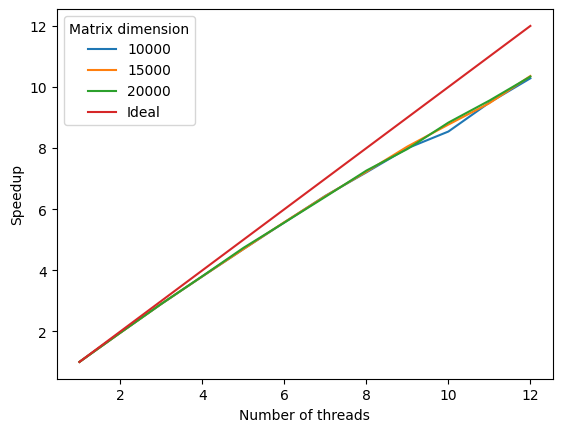

In [82]:

threads = 12
temp = []
for dim in [10000, 15000, 20000]:
    temp = calculate_speedup(OpenMPscal_THIN, dim, threads)
    plt.plot(temp[:, 0], temp[:, 1], label = dim)

plt.plot(temp[:, 0], temp[:, 0], label = "Ideal")
legend = plt.legend()
legend.set_title("Matrix dimension")
plt.xlabel("Number of threads")
plt.ylabel("Speedup")
    
plt.savefig("OpenMPscal_THIN_s50")
plt.close



<function matplotlib.pyplot.close(fig=None)>

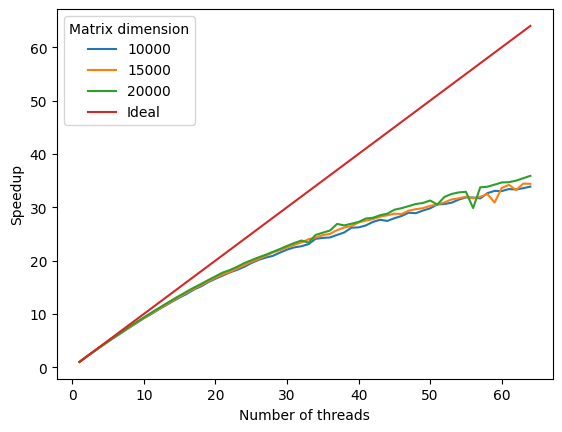

In [83]:
threads = 64
temp = []
for dim in [10000, 15000, 20000]:
    temp = calculate_speedup(OpenMPscal_EPYC, dim, threads)
    plt.plot(temp[:, 0], temp[:, 1], label = dim)

plt.plot(temp[:, 0], temp[:, 0], label = "Ideal")
legend = plt.legend()
legend.set_title("Matrix dimension")
plt.xlabel("Number of threads")
plt.ylabel("Speedup")
    
plt.savefig("OpenMPscal_EPYC_s50")
plt.close

In [84]:
Strongscal_THIN = np.genfromtxt('./Strong_scal/THIN/times5.csv', delimiter=',')
row_indices = np.arange(Strongscal_THIN.shape[0])
Strongscal_THIN = pd.DataFrame(data=Strongscal_THIN, columns=column_names, index=row_indices)

Strongscal_EPYC = np.genfromtxt('./Strong_scal/EPYC/times5.csv', delimiter=',')
row_indices = np.arange(Strongscal_EPYC.shape[0])
Strongscal_EPYC = pd.DataFrame(data=Strongscal_EPYC, columns=column_names, index=row_indices)

y_title = "Speedup"
x_title = "Number of processes"

In [85]:
Strongscal_THIN

,e,xwidth,steps,n_procs,n_threads,elapsed_time
0,1.0,10000.0,50.0,1.0,12.0,23.297327
1,1.0,10000.0,50.0,2.0,12.0,13.229976
2,1.0,10000.0,50.0,3.0,12.0,9.452198
3,1.0,10000.0,50.0,4.0,12.0,7.716337
4,1.0,10000.0,50.0,5.0,12.0,6.664793
5,1.0,10000.0,50.0,6.0,12.0,5.908416
6,1.0,10000.0,50.0,7.0,12.0,5.379028
7,1.0,10000.0,50.0,8.0,12.0,5.017599
8,1.0,15000.0,50.0,1.0,12.0,52.582393
9,1.0,15000.0,50.0,2.0,12.0,29.819218


In [86]:
def calculate_speedup(data, dim, procs):
    
    speedup = data[data['xwidth'] == dim][['n_procs', 'elapsed_time']].to_numpy()


    temp = speedup[0, 1]/speedup[:, 1]

    speedup = np.hstack((speedup[:, 0].reshape((procs, 1)), temp.reshape((procs, 1))))
    

    return speedup

<function matplotlib.pyplot.close(fig=None)>

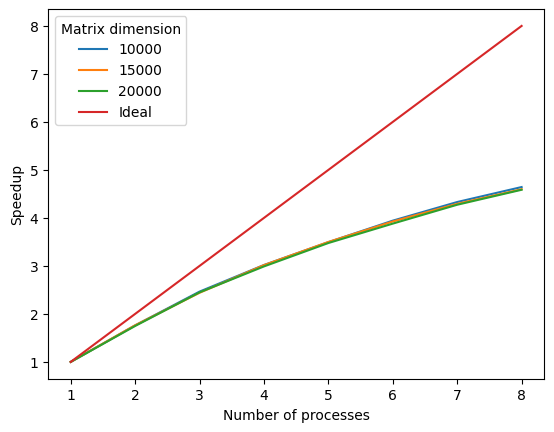

In [87]:
threads = 8
temp = []
for dim in [10000, 15000, 20000]:
    temp = calculate_speedup(Strongscal_THIN, dim, threads)
    # print(temp)
    plt.plot(temp[:, 0], temp[:, 1], label = dim)

plt.plot(temp[:, 0], temp[:, 0], label = "Ideal")
legend = plt.legend()
legend.set_title("Matrix dimension")
plt.xlabel(x_title)
plt.ylabel(y_title)
    
plt.savefig("Strongscal_THIN_s50")
plt.close



<function matplotlib.pyplot.close(fig=None)>

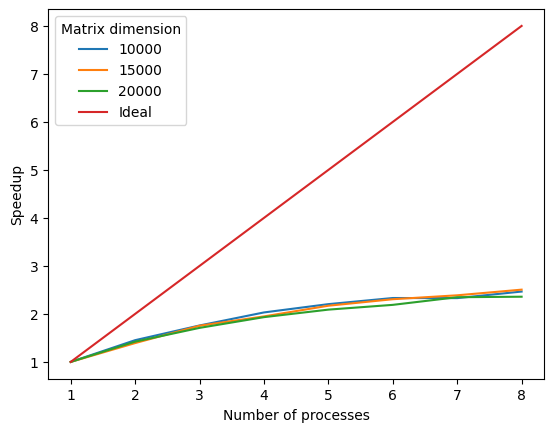

In [88]:
sockets = 8
temp = []
for dim in [10000, 15000, 20000]:
    temp = calculate_speedup(Strongscal_EPYC, dim, sockets)
    # print(temp)
    plt.plot(temp[:, 0], temp[:, 1], label = dim)

plt.plot(temp[:, 0], temp[:, 0], label = "Ideal")
legend = plt.legend()
legend.set_title("Matrix dimension")
plt.xlabel(x_title)
plt.ylabel(y_title)
    
plt.savefig("Strongscal_EPYC_s50")
plt.close